### Benötigten Bibliotheken importieren

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

### Klasse zur Speicherung von Messungen erstellt (measurment.py)

In [23]:
class Measurment:
    def __init__(self, distance, values):
        self.distance = distance
        self.values = values

    def mean(self):
        return np.mean(self.values)

    def std(self):
        return np.std(self.values)
    
    def upper(self):
        return np.mean(self.values) + np.std(self.values)
    
    def lower(self):
        return np.mean(self.values) - np.std(self.values)

### Alle Dateien im angegebene Ordner auslesen 
Jeweils 1000 Werte überspringen, 
danach die ersten 20 als Measurment Objekt zurückliefern.

In [24]:
def replace_dot(x):
    return x.replace(',', '.').encode()

def read(path):
    measurements = []
    for file in [file for file in os.listdir(path) if file.endswith(".csv")]:
        data = np.genfromtxt((replace_dot(x) for x in open(f"{path}/{file}")), delimiter=';', skip_header=1000, usecols=(1))
        measurements.append(Measurment(file.split(".")[0], data[:20])) 
    return sorted(measurements, key=lambda x: x.distance)

### Werte grafisch ausgeben
Alle Messungen befinden sich im Ordner 'aufgabe1-messungen'

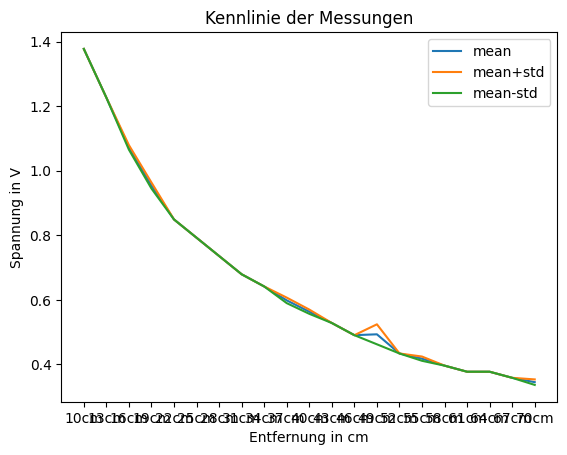

In [25]:
measurements = read('/home/hermandi/Schreibtisch/hochschule/AIN3.1/SSS/githubSSS/Aufgabe01/Messungen/')
distances = [point.distance for point in measurements]

plt.plot(distances, [m.mean() for m in measurements], label="mean")
plt.plot(distances, [m.upper() for m in measurements], label="mean+std")
plt.plot(distances, [m.lower() for m in measurements], label="mean-std")
plt.legend()
plt.xlabel('Entfernung in cm')
plt.ylabel('Spannung in V')
plt.title('Kennlinie der Messungen')
plt.show()

### Lineare Regression

In [26]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x ** 2)

    a = (n * xy_mean - n * x_mean * y_mean) / (n * x_squared_mean - n * x_mean ** 2)
    b = (y_mean - a * x_mean)

    return a, b

### Plotte den Zusammenhang der logarithmierten Werte

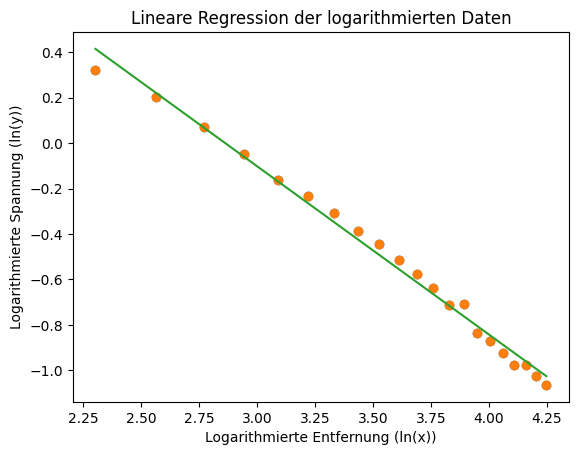

In [27]:
measurements = read('/home/hermandi/Schreibtisch/hochschule/AIN3.1/SSS/githubSSS/Aufgabe01/Messungen/')
log_distances = np.log(np.arange(10, 73, 3))
log_measurements_mean = np.log([m.mean() for m in measurements])

# Plot der logarithmierten Daten
plt.figure()
plt.plot(log_distances, log_measurements_mean, 'o', label="Logarithmierte Messwerte")
plt.xlabel('Logarithmierte Entfernung (ln(x))')
plt.ylabel('Logarithmierte Spannung (ln(y))')
plt.title('Logarithmierte Messwerte')

# Plot der Ausgleichsgeraden
a, b = linear_regression(log_distances, log_measurements_mean)
plt.plot(log_distances, log_measurements_mean, 'o', label="Logarithmierte Messwerte")
plt.plot(log_distances, a * log_distances + b, '-', label="Ausgleichsgerade")
plt.xlabel('Logarithmierte Entfernung (ln(x))')
plt.ylabel('Logarithmierte Spannung (ln(y))')
plt.title('Lineare Regression der logarithmierten Daten')
plt.show()

### Rückrechnung auf den ursprünglichen Zusammenhangreverse_calculation

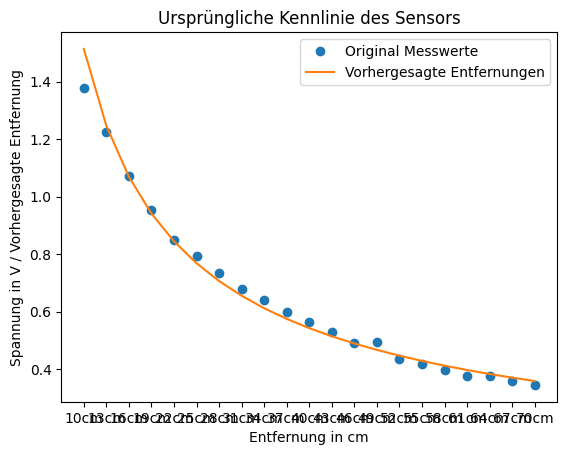

In [28]:
# Berechnung der Umrechnungsfunktion
def inverse_log_log(x, a, b):
    return np.exp(a * x + b)

# Rückrechnung auf ursprünglichen Zusammenhang
distances_predicted = inverse_log_log(log_distances, a, b)
#print(distances_predicted)

# Plot der ursprünglichen Kennlinie
plt.figure()
plt.plot(distances, [m.mean() for m in measurements], 'o', label="Original Messwerte")
plt.plot(distances, distances_predicted, '-', label="Vorhergesagte Entfernungen")
plt.xlabel('Entfernung in cm')
plt.ylabel('Spannung in V / Vorhergesagte Entfernung')
plt.title('Ursprüngliche Kennlinie des Sensors')

plt.legend()
plt.show()

Den Messfehler nach der Methode aus der Vorlesung schätzen.

Aufgrund des Anzahl an Messfehler benötigt man eine Korrektur. 

Wie groß ist der Vertrauensbereich für eine Sicherheit von 68 %, wie groß für eine Sicherheit von 95 %

In [43]:
def get_distance(y):
    return np.power(np.power(math.e, -b) * y, 1 / a)

#Ist get_distance das gleiche wie reverse_calculation?

#Kennlinie e^b * x^a
def reverse_calculation(x):
    return np.exp(b) * x ** a

def read_file(x):
    return np.genfromtxt(
        (replace_dot(x) for x in open(f"/home/hermandi/Schreibtisch/hochschule/AIN3.1/SSS/githubSSS/Aufgabe01/{x}")),
        delimiter=';', skip_header=100, usecols=(1))

#Diese Funktion dx_messung(x) berechnet die Ableitung der Rücktransformation
def dx_messung(x):
    return a * np.exp(b) * x**(a-1)


def calculate_std_mean(length_data):
    n = len(length_data)

    if n <= 1:
        return 0 #Die Standardabw. ist für weniger als 2 Datensätze undefiniert

    mean = sum(length_data) / n
    sum_squared_diff = sum((x - mean) ** 2 for x in length_data)

    std_dev = (sum_squared_diff / n) ** 0.5     #Wurzel ziehen ist das gleiche wie (x)^(0.5)
    std_dev_mittelwert = std_dev / (n ** 0.5)

    return std_dev_mittelwert

length_data = read_file("Blatt/blattL.csv")
length_mean = np.mean(length_data)
length_std = calculate_std_mean(length_data)

length_data = read_file("Blatt/blattB.csv")
breite_mean = np.mean(length_data)

#Konfidenzintervall 95 % (1.98 Sigma)
print(
    f"Die Laenge des Blattes beträgt zu 95% {np.round(get_distance(length_mean), 3)} cm +/-  {np.round(1.98 * length_std, 6)} cm")
#Konfidenzintervall 68 % (1 Sigma)
print(
    f"Die Laenge des Blattes beträgt zu 68% {np.round(get_distance(length_mean), 3)} cm +/-  {np.round(length_std, 6)} cm")

Die Laenge des Blattes beträgt zu 95% 28.419 cm +/-  3.9e-05 cm
Die Laenge des Blattes beträgt zu 68% 28.419 cm +/-  2e-05 cm


Messfehler:
Zur Ermittlung des Messfehlers müssen wir die Fehlerfortpflanzung durch die Kennlinie (e^b) * (x^a) berechnen (siehe Funktion: reverse_calculation)

breite = 8.981979812437448 mm
delta_x = -201.01802018756254 mm
delta_y = 1481.7168389957803 mm


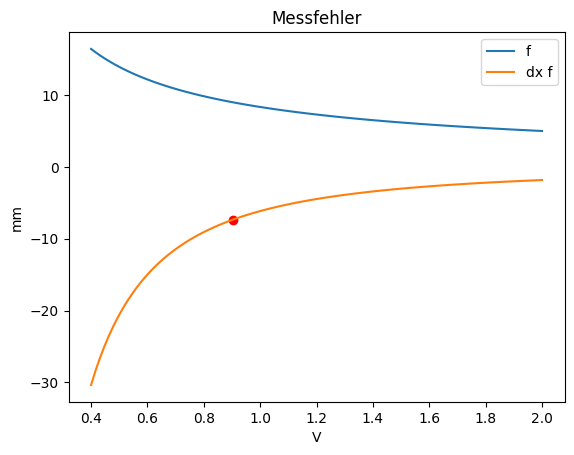

In [30]:
x = breite_mean
#x = paper_length_mean
measured_breite = reverse_calculation(x)
print("breite =", measured_breite, "mm")

delta_x = measured_breite - 210
print("delta_x =", delta_x, "mm")

delta_y = dx_messung(x) * delta_x
print("delta_y =", delta_y, "mm")

plt.figure()
plt.title("Messfehler")
plt.ylabel("mm")
plt.xlabel("V")
xc = np.linspace(0.4, 2, 100)
plt.plot(xc, reverse_calculation(xc), label="f")
plt.plot(xc, dx_messung(xc), label="dx f")
plt.scatter(x, dx_messung(x), color='r')
plt.legend()
plt.show()

#Fläche berechnen, unter Berücksichtigung der Gauss'schen Fehlerfortpflanzung

Um die Fläche A = l*b berechnen zu können, rechnen wir zuerst die laenge und breite mithilfe der inverse_log_log zurück

In [42]:
x_1 = breite_mean
x_2 = length_mean

print(x_1)
print(x_2)

def flaeche_berechnen(x_1,x_2):
    return reverse_calculation(x_1)*reverse_calculation(x_2)

print("Das ist einmal die inverse_log_log-Funktion")
print(inverse_log_log(x_1,a,b))
print(inverse_log_log(x_2,a,b))

print("Das ist die reverse_calculation-Funktion")
print(reverse_calculation(x_1))
print(reverse_calculation(x_2))

#print(flaeche_berechnen(x_1,x_2))

def partial_derivative_x1(x_1, x_2):
    return dx_messung(x_1) * reverse_calculation(x_2)

def partial_derivative_x2(x_1, x_2):
    return reverse_calculation(x_1) * dx_messung(x_2)

#Folie 14:Gaußsche Fehlerfortpflanzungsgesetz
def unsicherheit(x_1, x_2):
    dx_1 = delta_x
    dx_2 = delta_x

    derivative_x_1 = partial_derivative_x1(x_1, x_2)
    derivative_x_2 = partial_derivative_x2(x_1, x_2)

    #Formel der Gausschen Fehlerfortpflanzung
    area_uncertainty = np.sqrt((derivative_x_1 * dx_1)**2 + (derivative_x_2 * dx_2)**2)
    return area_uncertainty


print("Fläche:", flaeche_berechnen(x_1, x_2))
print("Unsicherheit der Fläche:", unsicherheit(x_1, x_2))

0.9019929378174409
0.6985790678689977
Das ist einmal die inverselolol Funktion
4.268206249448456
4.961781430122629
Das ist die reverse calc Funktion
8.981979812437448
10.85243972096848
Fläche: 97.47639448943318
Unsicherheit der Fläche: 26261.314654992053
